# 實驗：預測Clare是否打網球

In [1]:
import numpy as np
import pandas as pd

In [2]:
rawdata = {'Day': [1,2,3,4,5,6,7,8,9,10,11,12,13,14],
           'Outlook': ['Sunny','Sunny','Overcast','Rain','Rain','Rain','Overcast','Sunny','Sunny','Rain','Sunny','Overcast','Overcast','Rain'],
           'Temperature': ['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool','Mild','Mild','Mild','Hot','Mild'],
           'Humidity': ['High','High','High','High','Normal','Normal','Normal','High','Normal','Normal','Normal','High','Normal','High'],
           'Wind': ['Weak','Strong','Weak','Weak','Weak','Strong','Strong','Weak','Weak','Weak','Strong','Strong','Weak','Strong'],
           'Decision': ['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']}

In [3]:
df = pd.DataFrame(rawdata)     # 創建數據幀

In [4]:
df

,Day,Outlook,Temperature,Humidity,Wind,Decision
0,1,Sunny,Hot,High,Weak,No
1,2,Sunny,Hot,High,Strong,No
2,3,Overcast,Hot,High,Weak,Yes
3,4,Rain,Mild,High,Weak,Yes
4,5,Rain,Cool,Normal,Weak,Yes
5,6,Rain,Cool,Normal,Strong,No
6,7,Overcast,Cool,Normal,Strong,Yes
7,8,Sunny,Mild,High,Weak,No
8,9,Sunny,Cool,Normal,Weak,Yes
9,10,Rain,Mild,Normal,Weak,Yes


In [5]:
df.dtypes     # 查看數據類型

Day             int64
Outlook        object
Temperature    object
Humidity       object
Wind           object
Decision       object
dtype: object

In [6]:
df.drop('Day', axis=1, inplace=True)     # Day與預測無關，需要刪除
df_getdummy=pd.get_dummies(data=df, columns=['Outlook', 'Temperature', 'Humidity', 'Wind'])     # One-hot编码

In [7]:
df_getdummy

,Decision,Outlook_Overcast,Outlook_Rain,Outlook_Sunny,Temperature_Cool,Temperature_Hot,Temperature_Mild,Humidity_High,Humidity_Normal,Wind_Strong,Wind_Weak
0,No,0,0,1,0,1,0,1,0,0,1
1,No,0,0,1,0,1,0,1,0,1,0
2,Yes,1,0,0,0,1,0,1,0,0,1
3,Yes,0,1,0,0,0,1,1,0,0,1
4,Yes,0,1,0,1,0,0,0,1,0,1
5,No,0,1,0,1,0,0,0,1,1,0
6,Yes,1,0,0,1,0,0,0,1,1,0
7,No,0,0,1,0,0,1,1,0,0,1
8,Yes,0,0,1,1,0,0,0,1,0,1
9,Yes,0,1,0,0,0,1,0,1,0,1


In [8]:
X = df_getdummy.drop('Decision', axis=1)     # 輸入數據
y = df_getdummy['Decision']                  # 輸出數據

In [9]:
from sklearn.tree import DecisionTreeClassifier

In [10]:
dtree = DecisionTreeClassifier(criterion='entropy', max_depth=5)     # 設置分裂規則為信息增益，設定最大樹深度

In [11]:
dtree.fit(X,y)     # 啟動訓練

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [12]:
predictions = dtree.predict(X)     # 預測結果

In [13]:
pd.crosstab(y, predictions, rownames=['actual'], colnames=['prediction'])     # 計算混淆矩陣

prediction,No,Yes
actual,,
No,5,0
Yes,0,9


In [14]:
#!conda update scikit-learn --yes     # 首次需要運行這一行，更新sklearn，低版本不支持plot_tree

In [15]:
import sklearn
print(sklearn.__version__)     # 檢查版本，確認sklearn已更新至0.21或以上版本

1.0.2


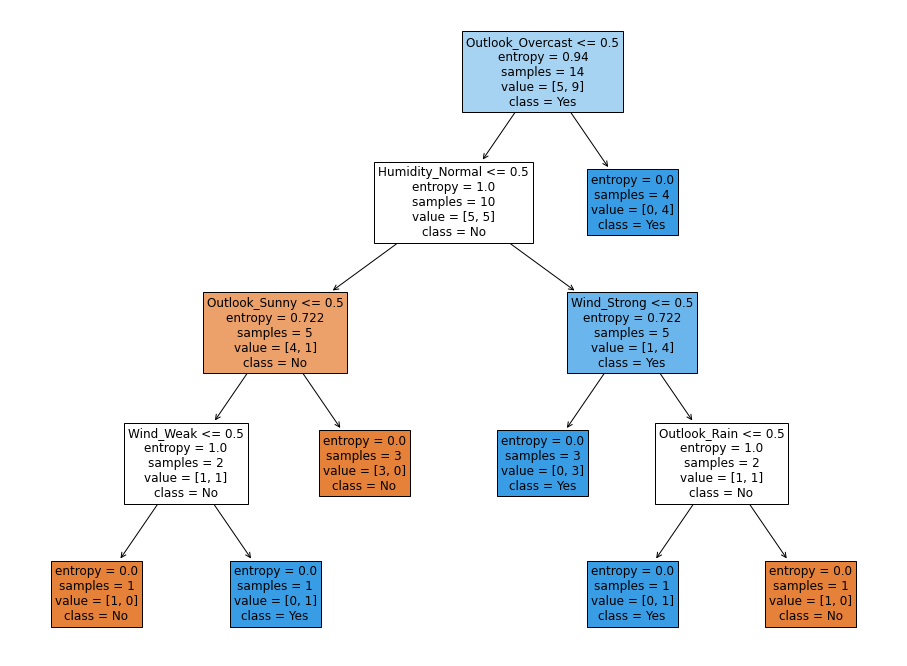

In [16]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(16,12))
plot_tree(dtree, feature_names=X.columns, fontsize=12, filled=True, class_names=['No', 'Yes'])     # 绘制决策树
plt.show()